# Car Price Prediction

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm  

%matplotlib inline

In [2]:
car_price = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Data Preparation

In [5]:
df = copy.copy(car_price)

In [6]:
# df.drop(['car_ID'], axis=1, inplace=True)

In [7]:
#Converting car name as per given instructions
df["CarName"] = df["CarName"].apply(lambda s: s.split("-")[0])

In [8]:
df["CarName"] = df["CarName"].apply(lambda s: s.split(" ")[0])

In [9]:
#Creating dummy variable for column 'fueltype'
fuel = pd.get_dummies(df['fueltype'])

In [10]:
fuel = pd.get_dummies(df['fueltype'],drop_first=True)

In [11]:
df = pd.concat([fuel,df],axis=1)

In [12]:
#Only keeping dummmy variable and dropping original column
df.drop(['fueltype'],axis=1,inplace=True)

In [13]:
#Creating dummy variable for column 'aspiration'
asp = pd.get_dummies(df['aspiration'])

In [14]:
asp = pd.get_dummies(df['aspiration'],drop_first=True)

In [15]:
df.drop(['aspiration'], axis= 1, inplace= True)

In [16]:
df = pd.concat([asp,df],axis=1)

In [17]:
# Converting 'doornumber' entries from format 'str' to 'int'
df['doornumber'] = df['doornumber'].map({'two': 2, 'four': 4})

In [18]:
# Converting 'cylindernumber' entries from format 'str' to 'int'
df['cylindernumber'] =df['cylindernumber'].map({'two': 2,'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12})

In [19]:
#Creating dummy variable for column 'carbody'
body = pd.get_dummies(df['carbody'],drop_first=True)

In [20]:
df= pd.concat([body,df],axis=1)

In [21]:
df.drop(['carbody'], axis= 1, inplace= True)

In [22]:
#Creating dummy variable for column 'drivewheel'
wheel = pd.get_dummies(df['drivewheel'],drop_first=True)

In [23]:
df= pd.concat([wheel,df],axis=1)

In [24]:
df.drop(['drivewheel'], axis= 1, inplace= True)

In [25]:
#Creating dummy variable for column 'enginetype'

etype = pd.get_dummies(df['enginetype'],drop_first=True)

In [26]:
df= pd.concat([etype,df],axis=1)

In [27]:
df.drop(['enginetype'], axis=1, inplace= True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dohcv             205 non-null    bool   
 1   l                 205 non-null    bool   
 2   ohc               205 non-null    bool   
 3   ohcf              205 non-null    bool   
 4   ohcv              205 non-null    bool   
 5   rotor             205 non-null    bool   
 6   fwd               205 non-null    bool   
 7   rwd               205 non-null    bool   
 8   hardtop           205 non-null    bool   
 9   hatchback         205 non-null    bool   
 10  sedan             205 non-null    bool   
 11  wagon             205 non-null    bool   
 12  turbo             205 non-null    bool   
 13  gas               205 non-null    bool   
 14  car_ID            205 non-null    int64  
 15  symboling         205 non-null    int64  
 16  CarName           205 non-null    object 
 1

CarName

In [29]:
#Creating dummy variable for column 'CarName'

name = pd.get_dummies(df['CarName'],drop_first= True)

In [30]:
df = pd.concat([name,df], axis =1)

In [31]:
df.drop(['CarName'], axis=1, inplace= True)

In [32]:
#Creating dummy variable for column 'fuelsystem'

system = pd.get_dummies(df['fuelsystem'], drop_first= True)

In [33]:
df= pd.concat([system,df],axis=1)

In [34]:
df.drop(['fuelsystem'],axis=1, inplace=True)

enginelocation

In [35]:
location = pd.get_dummies(df['enginelocation'],drop_first= True)

In [36]:
df= pd.concat([location,df],axis=1)

In [37]:
df.drop(['enginelocation'],axis=1, inplace= True)

# EDA
## spelling errors in CarNames
#### There are instances where name of same car companies spelled diifferently. E.g toyota and toyouta, porcshce ans porsche, vokswagen and volkswagen.

In [38]:
#Let's combine these columns pairwise

In [39]:
df['toyota'] = df['toyota'] + df['toyouta']

In [40]:
df.drop('toyouta', axis=1, inplace= True)

In [41]:
df['toyota'].value_counts()

toyota
False    173
True      32
Name: count, dtype: int64

In [42]:
df['porsche'] = df['porsche'] + df['porcshce']

In [43]:
df.drop('porcshce', axis=1, inplace= True)

In [44]:
df['porsche'].value_counts()

porsche
False    200
True       5
Name: count, dtype: int64

In [45]:
df['volkswagen'] = df['vokswagen'] + df['volkswagen']

In [46]:
df.drop('vokswagen', axis=1, inplace= True)

In [47]:
df['volkswagen'].value_counts()

volkswagen
False    195
True      10
Name: count, dtype: int64

In [48]:
df['mazda'] = df['mazda'] + df['maxda']

In [49]:
df.drop('maxda', axis=1, inplace= True)

In [50]:
df['mazda'].value_counts()

mazda
False    188
True      17
Name: count, dtype: int64

# Rescaling the features by normalization

In [51]:
def normalize (x): 
    return ( (x-np.mean(x))/ (max(x) - min(x)))

df= df.apply(normalize)

In [52]:
df.head()

,rear,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,alfa,audi,...,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,-0.014634,-0.321951,-0.014634,-0.097561,-0.004878,0.541463,-0.043902,-0.004878,0.985366,-0.034146,...,-0.038049,0.011671,0.100174,-0.274007,-0.071409,0.028679,-0.051070,-0.117209,-0.098716,0.005419
1,-0.014634,-0.321951,-0.014634,-0.097561,-0.004878,0.541463,-0.043902,-0.004878,0.985366,-0.034146,...,-0.038049,0.011671,0.100174,-0.274007,-0.071409,0.028679,-0.051070,-0.117209,-0.098716,0.080018
2,-0.014634,-0.321951,-0.014634,-0.097561,-0.004878,0.541463,-0.043902,-0.004878,0.985366,-0.034146,...,0.161951,0.094689,-0.464111,0.102184,-0.071409,0.207846,-0.051070,-0.172764,-0.125032,0.080018
3,-0.014634,-0.321951,-0.014634,-0.097561,-0.004878,0.541463,-0.043902,-0.004878,-0.014634,0.965854,...,-0.038049,-0.067575,-0.099826,0.068850,-0.008909,-0.008821,0.153011,-0.033875,-0.019769,0.016714
4,-0.014634,-0.321951,-0.014634,-0.097561,-0.004878,0.541463,-0.043902,-0.004878,-0.014634,0.965854,...,0.061951,0.034312,-0.099826,0.068850,-0.133909,0.045346,0.153011,-0.200542,-0.230295,0.103602


In [53]:
#To find highly correlated indpendent variables we are creating another dataframe which won't consist of dependent variable
cf = copy.copy(df)
cf.drop('price', axis= 1, inplace=True)

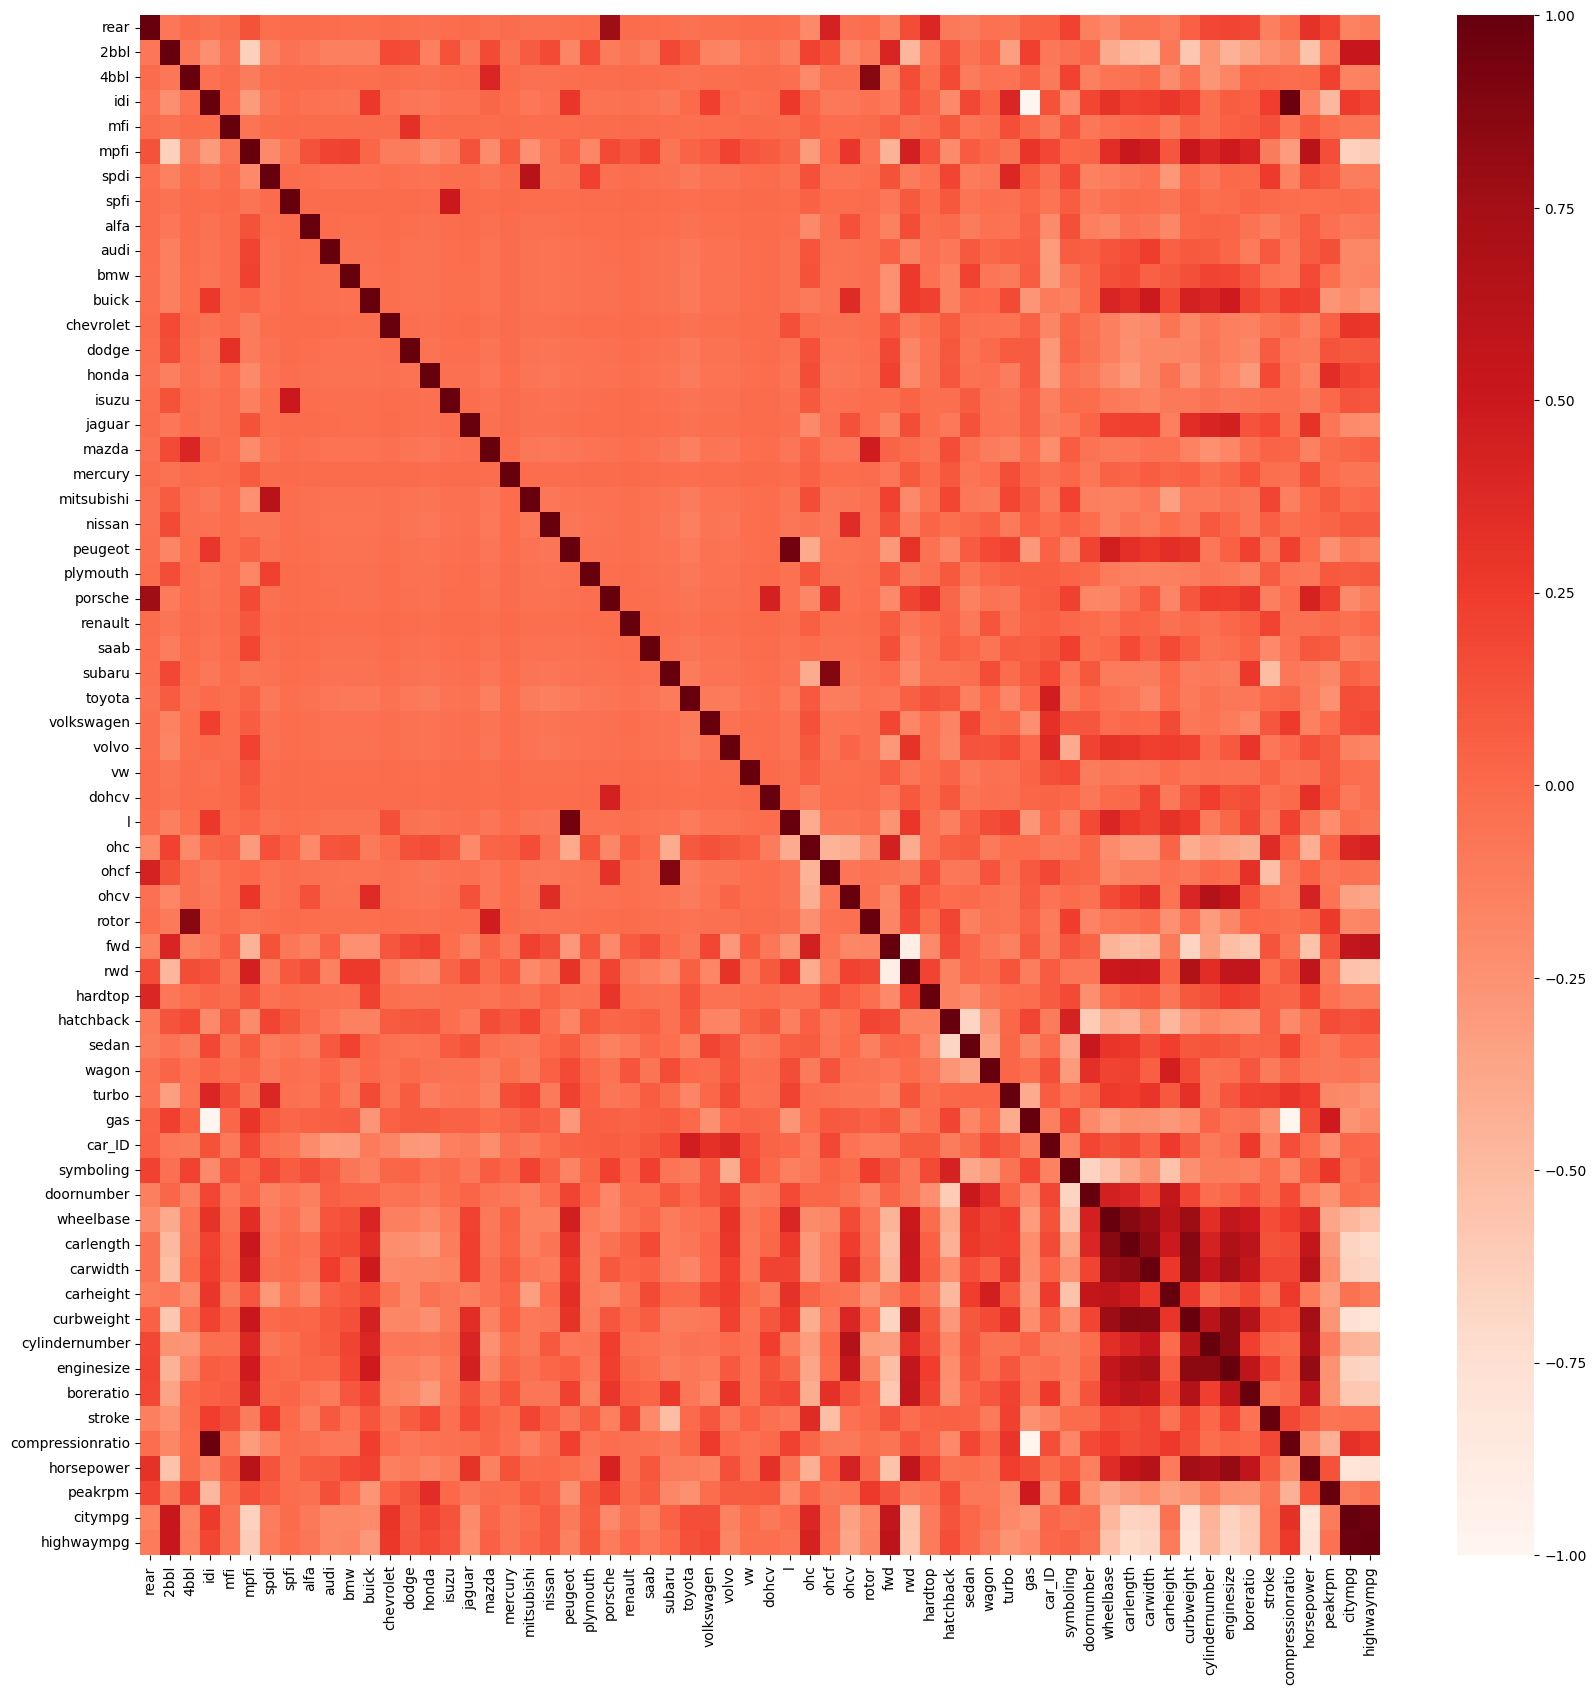

In [54]:
plt.figure(figsize=(20,20))
# heatmap with a color map of choice
cf_corr= cf.corr()
sns.heatmap(cf_corr, cmap="Reds")
plt.show()


In [55]:
cf_corr.style.background_gradient().format(precision=2)

,rear,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,alfa,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,vw,dohcv,l,ohc,ohcf,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
rear,1.00,-0.08,-0.01,-0.04,-0.01,0.13,-0.03,-0.01,-0.01,-0.02,-0.02,-0.02,-0.01,-0.03,-0.03,-0.02,-0.01,-0.04,-0.01,-0.03,-0.04,-0.03,-0.02,0.77,-0.01,-0.02,-0.03,-0.05,-0.03,-0.03,-0.01,-0.01,-0.03,-0.20,0.43,-0.03,-0.02,-0.14,0.16,0.39,-0.09,-0.11,-0.05,-0.06,0.04,0.05,0.21,-0.14,-0.19,-0.05,-0.05,-0.11,0.05,0.18,0.20,0.19,-0.14,-0.02,0.32,0.20,-0.15,-0.10
2bbl,-0.08,1.00,-0.08,-0.23,-0.05,-0.63,-0.15,-0.05,-0.08,-0.13,-0.14,-0.14,0.18,0.16,-0.14,0.13,-0.08,0.17,-0.05,0.08,0.17,-0.16,0.16,-0.11,-0.07,-0.12,0.18,0.08,-0.16,-0.16,-0.07,-0.05,-0.13,0.22,0.13,-0.18,-0.10,0.41,-0.46,-0.08,0.12,-0.06,0.03,-0.32,0.23,-0.09,-0.03,0.02,-0.40,-0.49,-0.52,-0.08,-0.58,-0.25,-0.44,-0.35,-0.23,-0.18,-0.54,-0.10,0.52,0.53
4bbl,-0.01,-0.08,1.00,-0.04,-0.01,-0.11,-0.03,-0.01,-0.01,-0.02,-0.02,-0.02,-0.01,-0.03,-0.03,-0.02,-0.01,0.41,-0.01,-0.03,-0.04,-0.03,-0.02,-0.02,-0.01,-0.02,-0.03,-0.05,-0.03,-0.03,-0.01,-0.01,-0.03,-0.20,-0.03,-0.03,0.86,-0.14,0.16,-0.02,0.17,-0.11,-0.05,-0.06,0.04,-0.09,0.21,-0.14,-0.07,-0.05,-0.01,-0.21,-0.04,-0.27,-0.17,0.00,-0.00,-0.02,-0.01,0.22,-0.15,-0.14
idi,-0.04,-0.23,-0.04,1.00,-0.02,-0.30,-0.07,-0.02,-0.04,-0.06,-0.07,0.27,-0.04,-0.07,-0.09,-0.05,-0.04,0.02,-0.02,-0.09,-0.04,0.29,-0.06,-0.05,-0.03,-0.06,-0.08,-0.01,0.23,-0.01,-0.03,-0.02,0.27,0.02,-0.09,-0.09,-0.05,-0.09,0.12,0.02,-0.20,0.19,0.03,0.40,-1.00,0.13,-0.19,0.19,0.31,0.21,0.23,0.28,0.22,-0.02,0.07,0.05,0.24,0.98,-0.16,-0.48,0.26,0.19
mfi,-0.01,-0.05,-0.01,-0.02,1.00,-0.06,-0.02,-0.00,-0.01,-0.01,-0.01,-0.01,-0.01,0.33,-0.02,-0.01,-0.01,-0.02,-0.00,-0.02,-0.02,-0.02,-0.01,-0.01,-0.01,-0.01,-0.02,-0.03,-0.02,-0.02,-0.01,-0.00,-0.02,0.04,-0.02,-0.02,-0.01,0.06,-0.05,-0.01,0.10,-0.07,-0.03,0.15,0.02,-0.09,0.12,-0.08,-0.03,-0.00,0.01,-0.10,0.03,-0.02,0.05,0.07,0.14,-0.06,0.07,-0.02,-0.07,-0.07
mpfi,0.13,-0.63,-0.11,-0.30,-0.06,1.00,-0.20,-0.06,0.13,0.20,0.22,0.02,-0.11,-0.10,-0.20,-0.13,0.13,-0.21,0.08,-0.24,-0.06,0.04,-0.17,0.17,0.11,0.19,-0.06,0.04,0.06,0.22,0.11,0.08,0.02,-0.30,0.00,0.28,-0.06,-0.44,0.45,0.12,-0.21,0.08,0.02,-0.05,0.30,0.19,0.01,0.03,0.35,0.51,0.46,0.11,0.52,0.39,0.48,0.42,-0.11,-0.31,0.63,0.15,-0.64,-0.61
spdi,-0.03,-0.15,-0.03,-0.07,-0.02,-0.20,1.00,-0.02,-0.03,-0.04,-0.04,-0.04,-0.03,-0.05,-0.06,-0.03,-0.03,-0.06,-0.02,0.63,-0.06,-0.05,0.22,-0.03,-0.02,-0.04,-0.05,-0.09,-0.05,-0.05,-0.02,-0.02,-0.05,0.13,-0.06,-0.06,-0.03,0.13,-0.12,-0.04,0.20,-0.11,-0.08,0.39,0.07,-0.04,0.18,-0.15,-0.12,-0.08,-0.05,-0.28,-0.00,-0.08,0.00,-0.00,0.25,-0.15,0.12,0.07,-0.12,-0.11
spfi,-0.01,-0.05,-0.01,-0.02,-0.00,-0.06,-0.02,1.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.02,-0.02,0.50,-0.01,-0.02,-0.00,-0.02,-0.02,-0.02,-0.01,-0.01,-0.01,-0.01,-0.02,-0.03,-0.02,-0.02,-0.01,-0.00,-0.02,0.04,-0.02,-0.02,-0.01,-0.08,0.09,-0.01,0.10,-0.07,-0.03,-0.03,0.02,-0.07,0.07,-0.08,-0.03,-0.01,-0.02,-0.07,0.02,-0.02,-0.01,0.03,-0.01,-0.02,-0.03,-0.02,-0.01,-0.02
alfa,-0.01,-0.08,-0.01,-0.04,-0.01,0.13,-0.03,-0.01,1.00,-0.02,-0.02,-0.02,-0.01,-0.03,-0.03,-0.02,-0.01,-0.04,-0.01,-0.03,-0.04,-0.03,-0.02,-0.02,-0.01,-0.02,-0.03,-0.05,-0.03,-0.03,-0.01,-0.01,-0.03,-0.20,-0.03,0.13,-0.02,-0.14,0.16,-0.02,-0.00,-0.11,-0.05,-0.06,0.04,-0.21,0.15,-0.14,-0.17,-0.04,-0.08,-0.19,0.02,0.03,0.03,-0.06,-0.12,-0.04,0.07,-0.03,-0.09,-0.07
audi,-0.02,-0.13,-0.02,-0.06,-0.01,0.20,-0.04,-0.01,-0.02,1.00,-0.04,-0.04,-0.02,-0.04,-0.05,-0.03,-0.02,-0.06,-0.01,-0.05,-0.06,-0.04,-0.04,-0.03,-0.02,-0.03,-0.05,-0.08,-0.04,-0.04,-0.02,-0.01,-0.05,0.12,-0.05,-0.05,-0.03,0.05,-0.14,-0.04,-0.08,0.09,0.01,0.05,0.06,-0.31,0.07,0.06,0.11,0.15,0.25,0.05,0.09,0.0

### Removing columns with high correlation value

In [56]:
#dropping columns which have vey high correlation coefficient (columns with coefficients in between 0.984356 and 0.801456)
df.drop(['compressionratio','citympg','l','ohcf','fwd','carlength','curbweight','4bbl','cylindernumber','car_ID'],axis=1,inplace=True)

### Model 1

In [57]:
#Dependent variable
X = df.loc[:,'2bbl':'highwaympg']

#Independent variable
y = df.loc[:,'price']

In [58]:
# Splitting data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [59]:
# Defining VVIF function to check for multicollinearity afterwards
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [60]:
lm = LinearRegression()        #Creating LinearRegression object
rfe = RFE(estimator=lm, n_features_to_select=13)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

[False False False False False False  True  True  True  True False False
 False False  True False False False False False False  True False  True
 False False False  True False  True False False  True False False False
 False False False False False False  True  True False  True False False
 False False False]
[22 27 37 23 25 39  1  1  1  1 12 28 21 11  1 13 38 26 18 16 29  1 35  1
 10 15 19  1 14  1 33 17  1 32  7  3  4  5  9 24 36 30  1  1 20  1  2 34
 31  6  8]


In [61]:
col = X_train.columns[rfe.support_]             #Creating list of columns from rfe.support_

In [62]:
X_train_rfe = X_train[col]             #Creating a dataframe to train the model from column selected through rfe.

In [63]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [64]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [65]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     122.5
Date:                Sat, 16 Aug 2025   Prob (F-statistic):           7.09e-66
Time:                        23:51:34   Log-Likelihood:                 217.49
No. Observations:                 143   AIC:                            -407.0
Df Residuals:                     129   BIC:                            -365.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.005      0.106      0.9

In [66]:
#Creating a dataframe as an input for vif_cal function
kf = df[col]
kf = kf.join(df['price'])

In [67]:
col

Index(['alfa', 'audi', 'bmw', 'buick', 'jaguar', 'porsche', 'saab', 'volvo',
       'dohcv', 'rotor', 'wheelbase', 'carwidth', 'enginesize'],
      dtype='object')

In [68]:
vif_cal(input_data=kf,dependent_col="price" )

,Var,Vif
11,carwidth,6.53
12,enginesize,4.63
10,wheelbase,3.96
3,buick,1.81
4,jaguar,1.65
5,porsche,1.64
8,dohcv,1.40
1,audi,1.28
7,volvo,1.24
2,bmw,1.23


##### This model is stable but there are  variables 'dohcv' and 'wheelbase' which have very high p-value. In next model we will drop 'dohcv'

### Model 2

In [69]:
# New set of features after dropping the ones with high p-value
col2 = ['alfa', 'audi', 'bmw', 'buick', 'jaguar', 'porsche', 'saab', 'volvo', 'rotor', 'wheelbase', 'carwidth', 'enginesize']

In [70]:
X_train2 = X_train[col2]

In [71]:
X_train2 = sm.add_constant(X_train2)

In [72]:
lm2 = sm.OLS(y_train,X_train2).fit()

In [73]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     132.1
Date:                Sat, 16 Aug 2025   Prob (F-statistic):           1.25e-66
Time:                        23:51:34   Log-Likelihood:                 216.67
No. Observations:                 143   AIC:                            -407.3
Df Residuals:                     130   BIC:                            -368.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.005      0.062      0.9

In [74]:
kf2 = df[col2]
kf2 = kf2.join(df['price'])

In [75]:
vif_cal(input_data=kf2,dependent_col="price" )

,Var,Vif
10,carwidth,5.85
11,enginesize,4.49
9,wheelbase,3.87
3,buick,1.80
4,jaguar,1.65
5,porsche,1.41
1,audi,1.25
2,bmw,1.23
7,volvo,1.23
8,rotor,1.15


##### Model 2 has all the p values within range except for 'wheelbase'. In next model we will drop variable 'wheelbase'

### Model 3

In [76]:
col3 = ['alfa', 'audi', 'bmw', 'buick', 'jaguar', 'porsche', 'saab', 'volvo', 'rotor', 'carwidth', 'enginesize']

In [77]:
X_train3 = X_train[col3]

In [78]:
X_train3 = sm.add_constant(X_train3)

In [79]:
lm3 = sm.OLS(y_train,X_train3).fit()

In [80]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     141.8
Date:                Sat, 16 Aug 2025   Prob (F-statistic):           4.24e-67
Time:                        23:51:34   Log-Likelihood:                 215.10
No. Observations:                 143   AIC:                            -406.2
Df Residuals:                     131   BIC:                            -370.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.48e-05      0.005      0.005      0.9

In [81]:
kf3 = df[col3]
kf3 = kf3.join(df['price'])

In [82]:
vif_cal(input_data=kf3,dependent_col="price" )

,Var,Vif
10,enginesize,4.48
9,carwidth,3.30
3,buick,1.79
4,jaguar,1.64
1,audi,1.22
5,porsche,1.21
2,bmw,1.18
7,volvo,1.18
8,rotor,1.12
0,alfa,1.04


##### Model 3 has all the p values within range. But the variable 'enginesize' has high vif

### Model 4

In [83]:
col4 = ['alfa', 'audi', 'bmw', 'buick', 'jaguar', 'porsche', 'saab', 'volvo', 'rotor', 'carwidth']

In [84]:
X_train4 = X_train[col4]

In [85]:
X_train4 = sm.add_constant(X_train4)

In [86]:
lm4 = sm.OLS(y_train,X_train4).fit()

In [87]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     102.2
Date:                Sat, 16 Aug 2025   Prob (F-statistic):           4.00e-57
Time:                        23:51:34   Log-Likelihood:                 187.28
No. Observations:                 143   AIC:                            -352.6
Df Residuals:                     132   BIC:                            -320.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0036      0.006     -0.629      0.5

In [88]:
kf4 = df[col4]
kf4 = kf4.join(df['price'])

In [89]:
vif_cal(input_data=kf4,dependent_col="price" )

,Var,Vif
9,carwidth,1.94
3,buick,1.56
1,audi,1.18
7,volvo,1.18
4,jaguar,1.14
2,bmw,1.04
5,porsche,1.04
6,saab,1.03
0,alfa,1.01
8,rotor,1.01


### Here we have all the p-values and VIF values within expected range

## Predictions on model 4

In [90]:
X_test4 = X_test[col4]               #Creating a dataframe to test the model from column selected through rfe

# Adding a constant variable 
X_test4 = sm.add_constant(X_test4, has_constant='add')
# Making predictions
y_pred4 = lm4.predict(X_test4)

## Evaluation of model 4

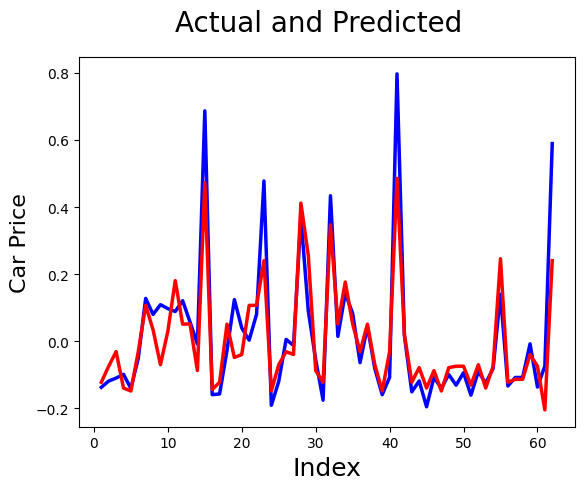

In [91]:
c = [i for i in range(1,63,1)] # generating index 
fig = plt.figure() 
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-") #Plotting Actual
plt.plot(c,y_pred4, color="red",  linewidth=2.5, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)                       # Y-label
plt.show()

In [92]:
y_pred4

160   -0.122322
186   -0.074490
59    -0.031007
165   -0.139715
140   -0.148412
         ...   
28    -0.113625
29    -0.039703
182   -0.074490
40    -0.204940
128    0.240384
Length: 62, dtype: float64

In [93]:
# y_pred4 =y_pred4.rename(columns={0:'price'})

Text(0, 0.5, 'ytest-ypred')

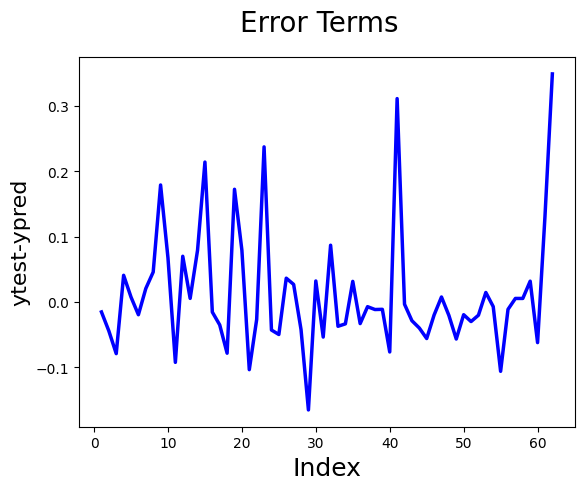

In [94]:
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred4, color="blue", linewidth=2.5, linestyle="-")
# plt.scatter(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")

fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

Text(0, 0.5, 'y_pred')

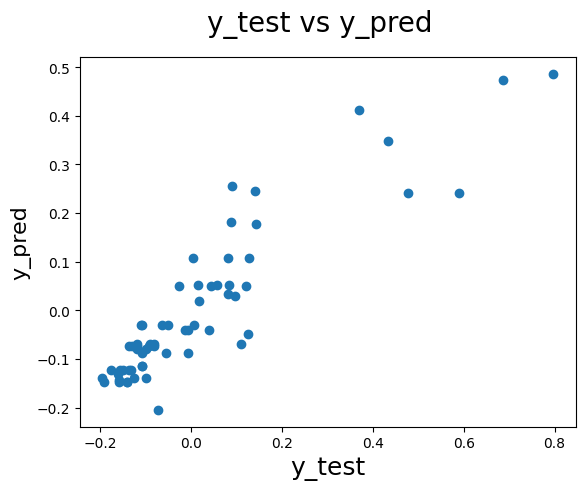

In [95]:
fig = plt.figure()
plt.scatter(y_test,y_pred4)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                        # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

/var/folders/pq/k834vl0x5nq58qg9kgddkwrr0000gn/T/ipykernel_12001/1046446616.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-y_pred4),bins=50)


Text(0, 0.5, 'Index')

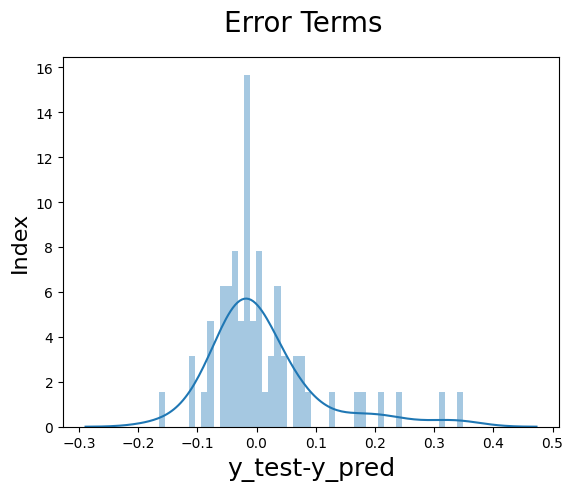

In [96]:
fig = plt.figure()
sns.distplot((y_test-y_pred4),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label